In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from utils import u_darrays as uda, constants as cnst
import datetime
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from utils import u_darrays
import ipdb
from utils import constants as cnst, u_met
import salem
from utils import u_statistics as us
from salem import get_demo_file, DataLevels, GoogleVisibleMap, Map


%matplotlib inline

/home/ck/miniconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
fname = '/home/ck/DIR/cornkle/data/HUARAZ/shapes/riosan_sel_one.shp'
sdf = salem.read_shapefile(fname)

In [4]:
flist = []
for mm in [1,2,3,4,9,10,11,12]:
    flist.append('/home/ck/DIR/cornkle/data/HUARAZ/NDVItrend_linregress_['+str(mm)+'].nc')

mfd = xr.open_mfdataset(flist, concat_dim='id', combine='nested')

In [5]:
ndvi_trend = mfd['ndvi_trend'].load()

In [6]:
ndvi_mean = mfd['ndvi_mean'].load()

In [7]:
mfd

<xarray.Dataset>
Dimensions:     (id: 8, lat: 769, latitude: 769, lon: 470, longitude: 470, month: 8)
Coordinates:
  * month       (month) int64 1 2 3 4 9 10 11 12
  * latitude    (latitude) float64 -8.634 -8.636 -8.639 ... -10.23 -10.23 -10.23
  * longitude   (longitude) float64 -78.0 -78.0 -77.99 ... -77.03 -77.02 -77.02
  * lat         (lat) float64 -8.634 -8.636 -8.639 ... -10.23 -10.23 -10.23
  * lon         (lon) float64 -78.0 -78.0 -77.99 -77.99 ... -77.03 -77.02 -77.02
Dimensions without coordinates: id
Data variables:
    ndvi_trend  (id, latitude, longitude) float64 nan nan nan ... nan nan nan
    ndvi_mean   (id, latitude, longitude) float32 nan nan nan ... nan nan nan
    pval        (id, latitude, longitude) float64 dask.array<chunksize=(1, 769, 470), meta=np.ndarray>
    valid       (id, month, lat, lon) float64 dask.array<chunksize=(1, 8, 769, 470), meta=np.ndarray>

In [10]:
means = ndvi_mean.squeeze()

In [11]:
means

<xarray.DataArray 'ndvi_mean' (id: 8, latitude: 769, longitude: 470)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 -8.634 -8.636 -8.639 ... -10.23 -10.23 -10.23
  * longitude  (longitude) float64 -78.0 -78.0 -77.99 ... -77.03 -77.02 -77.02
Dimensions without coordinates: id

In [12]:
valmask = np.isfinite(means[means['id']==4]).astype(int).squeeze()

In [13]:
np.sum(valmask)

<xarray.DataArray 'ndvi_mean' ()>
array(94804)

In [14]:
pval = mfd['pval'].load()

In [15]:
sig = ndvi_trend.copy()
sig.values[pval.values>0.05] = 0

In [16]:
np.sum(ndvi_trend.values[pval.values>0.05])

558.4783172495127

In [17]:
np.sum(sig.values[pval.values>0.05])

0.0

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

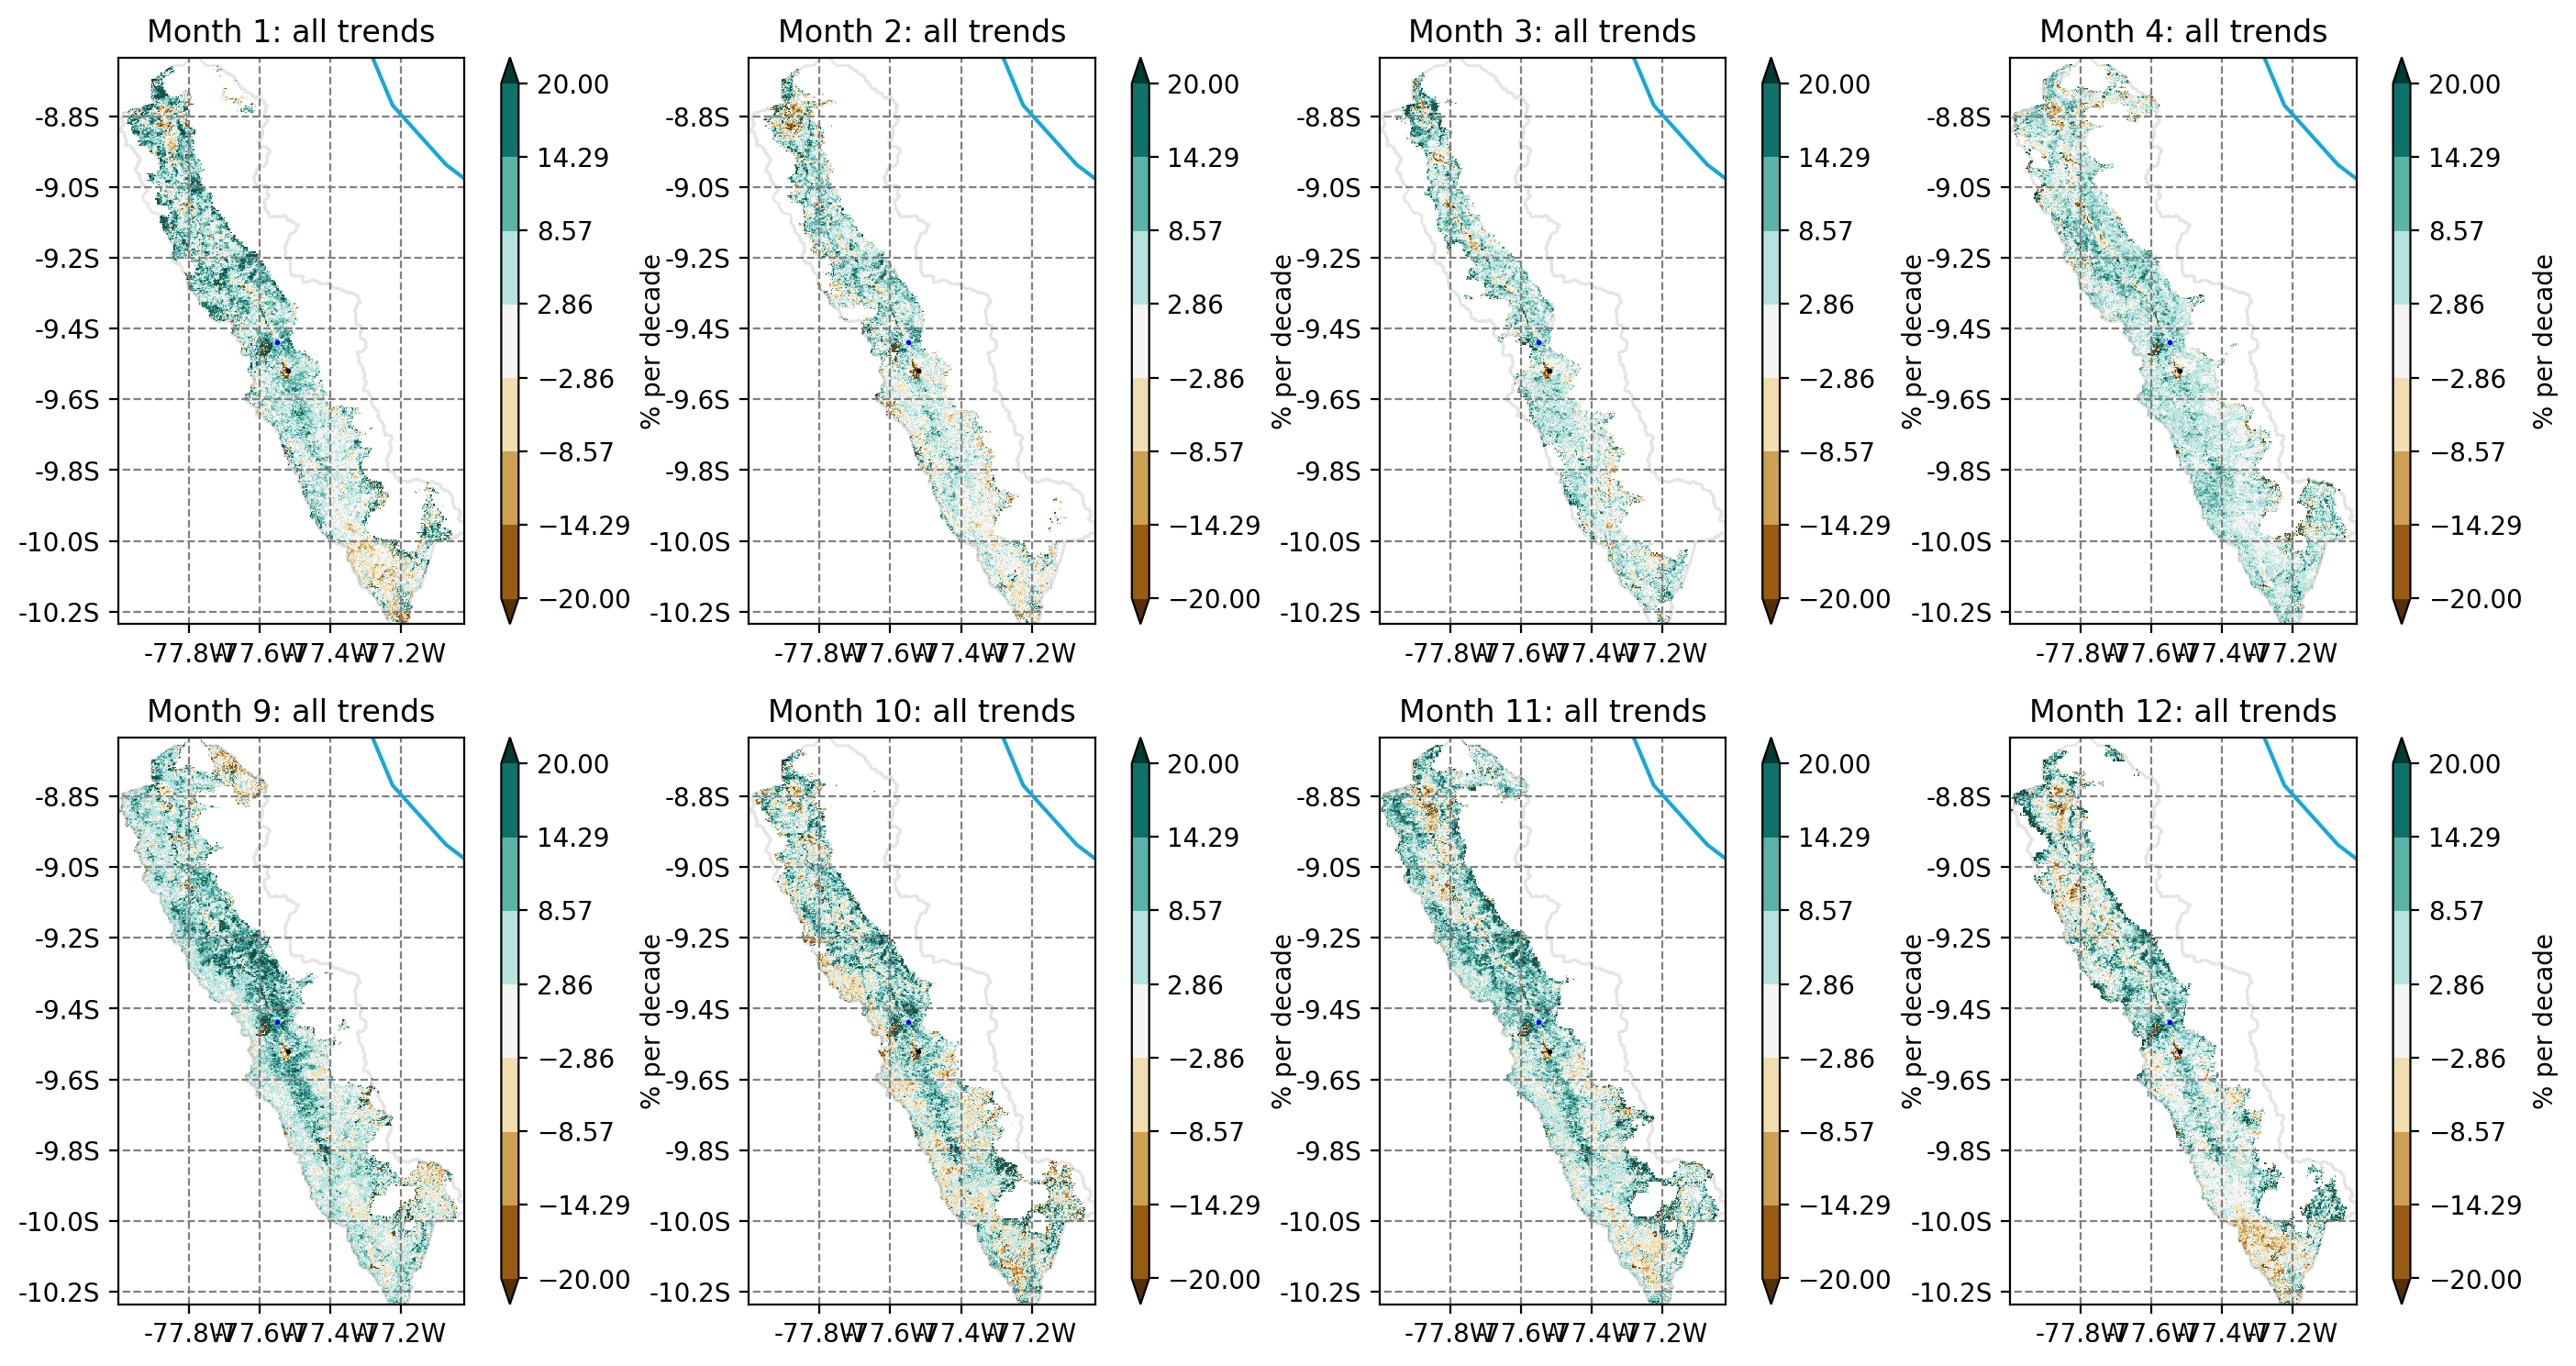

In [18]:
m=1
smap = ndvi_trend.salem.get_map()
f = plt.figure(figsize=(17,9), dpi=200)

smap.set_shapefile(sdf,facecolor='white', color='k', linewidth=1., alpha=0.1)
smap.set_plot_params(levels=np.linspace(-20, 20, 8), cmap='BrBG')
smap.set_shapefile(rivers=True)
smap.set_shapefile(lakes=True, facecolor='blue', edgecolor='blue')

x, y = smap.grid.transform(-77.52, -9.52)
xx, yy = smap.grid.transform(-77.55, -9.438)

cnt = 0
for m, pl in zip([1,2,3,4,9,10,11,12], ndvi_trend):
    
    mmean = ndvi_mean.isel(id=cnt)

    ax = f.add_subplot(2,4,cnt+1)
    
    plt.plot(x, y, 'ko', markersize=1)
    plt.plot(xx, yy, 'bo', markersize=1)


    smap.set_data(np.round(pl*10,2)/mmean*100)
    smap.visualize(ax=ax,addcbar=True, title='Month '+str(m)+ ': all trends', cbar_title='% per decade')
    cnt += 1
    
plt.tight_layout
#f.savefig('/home/ck/DIR/cornkle/figs/HUARAZ/NDVI_trends/NDVI_linregress_trend_2000-2019_rel.jpg')

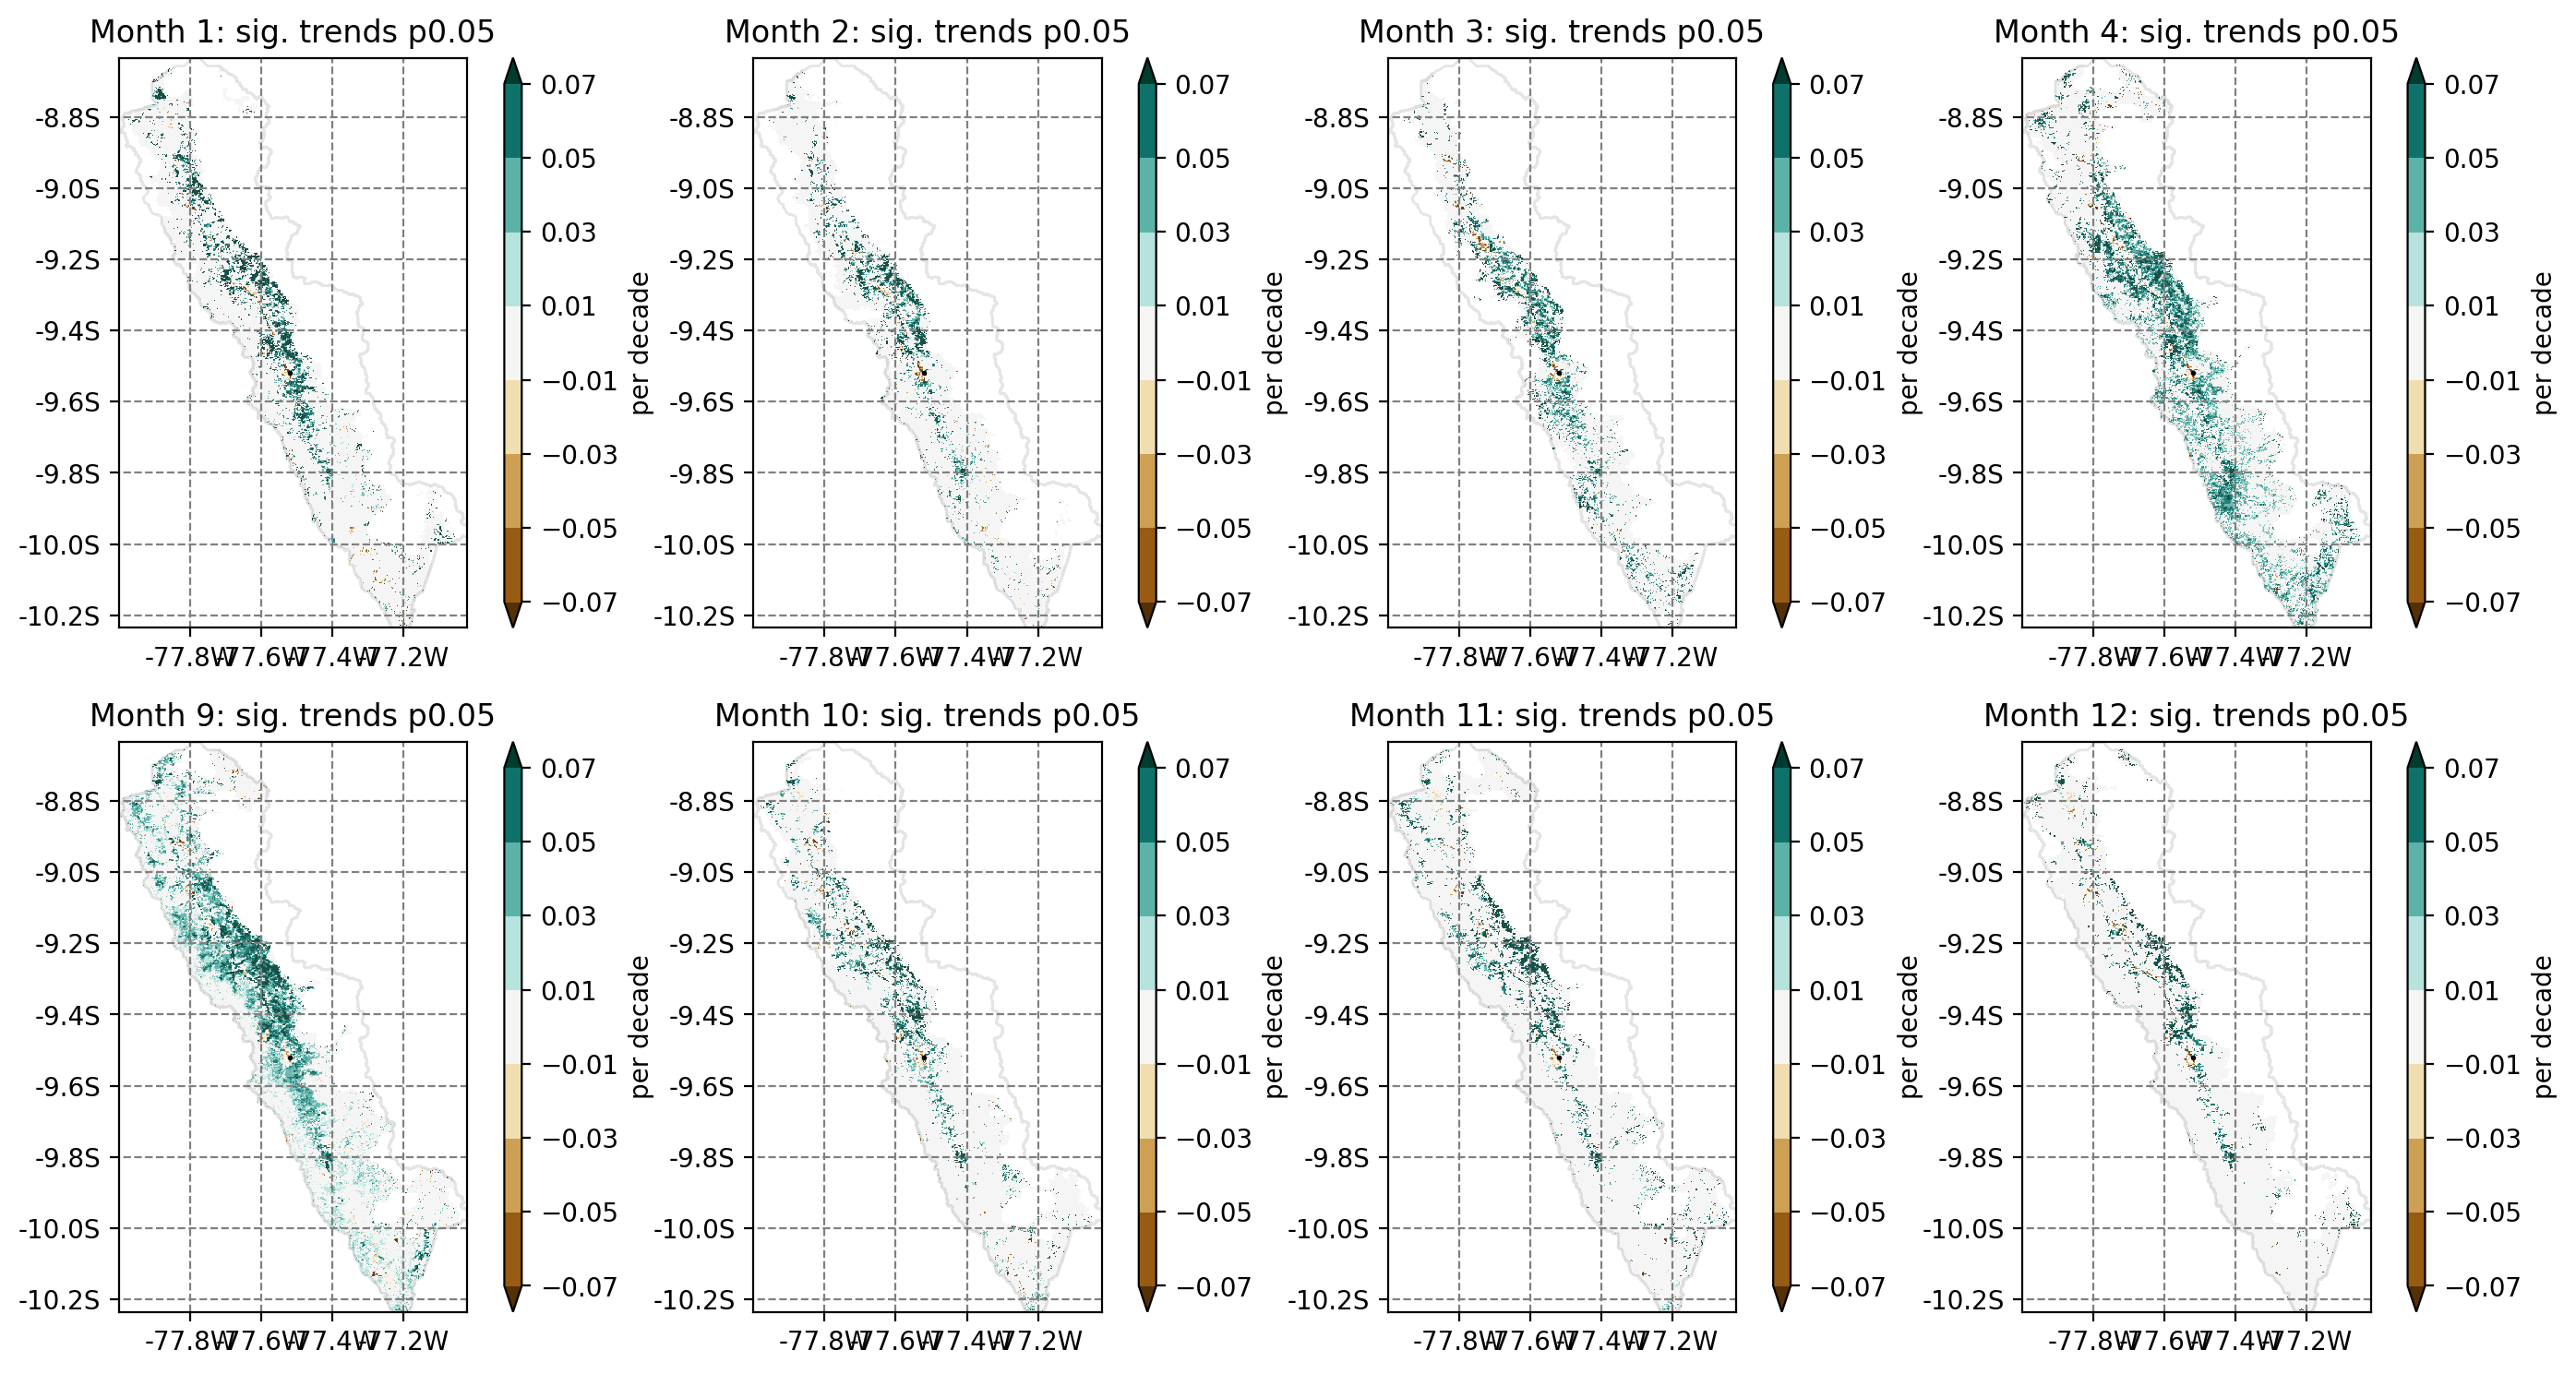

In [86]:
m=1
smap = sig.salem.get_map()
f = plt.figure(figsize=(17,9), dpi=200)

smap.set_shapefile(sdf,facecolor='white', color='k', linewidth=1., alpha=0.1)
smap.set_plot_params(levels=np.linspace(-0.07, 0.07, 8), cmap='BrBG')
cnt = 1
for m, pl in zip([1,2,3,4,9,10,11,12], sig):

    ax = f.add_subplot(2,4,cnt)
    
    plt.plot(x, y, 'ko', markersize=1)

    smap.set_data(np.round(pl*10,2))
    smap.visualize(ax=ax,addcbar=True, title='Month '+str(m)+ ': sig. trends p0.05', cbar_title='per decade')
    cnt += 1
f.savefig('/home/ck/DIR/cornkle/figs/HUARAZ/NDVI_trends/NDVI_linregress_sigtrend_2000-2019.jpg')

In [105]:
vegfra = '/home/ck/DIR/cornkle/data/HUARAZ/Lorenz_NDVI/landclass.tiff'

In [110]:
from salem import get_demo_file, open_xr_dataset, GeoTiff, wgs84
# evergreen forest
g = GeoTiff(vegfra)
ex = sig.salem.grid.extent_in_crs(crs=wgs84)  # l, r, b, t
g.set_subset(corners=((ex[0], ex[2]), (ex[1], ex[3])),
             crs=wgs84, margin=10)
# g.set_subset(corners=((-76.19, -4.7),(-76, -4.71)),
#              crs=wgs84, margin=10)
ls = g.get_vardata()
#ls = np.array(ls, dtype=float)
# ls[ls > 200] = np.nan
# ls = grid.map_gridded_data(ls, g.grid)

In [125]:
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)

    #return base.from_list(cmap_name, color_list, N)
    return plt.cm.get_cmap(base_cmap, N)

In [126]:
dmap = discrete_cmap(len(np.unique(ls)), base_cmap='viridis')

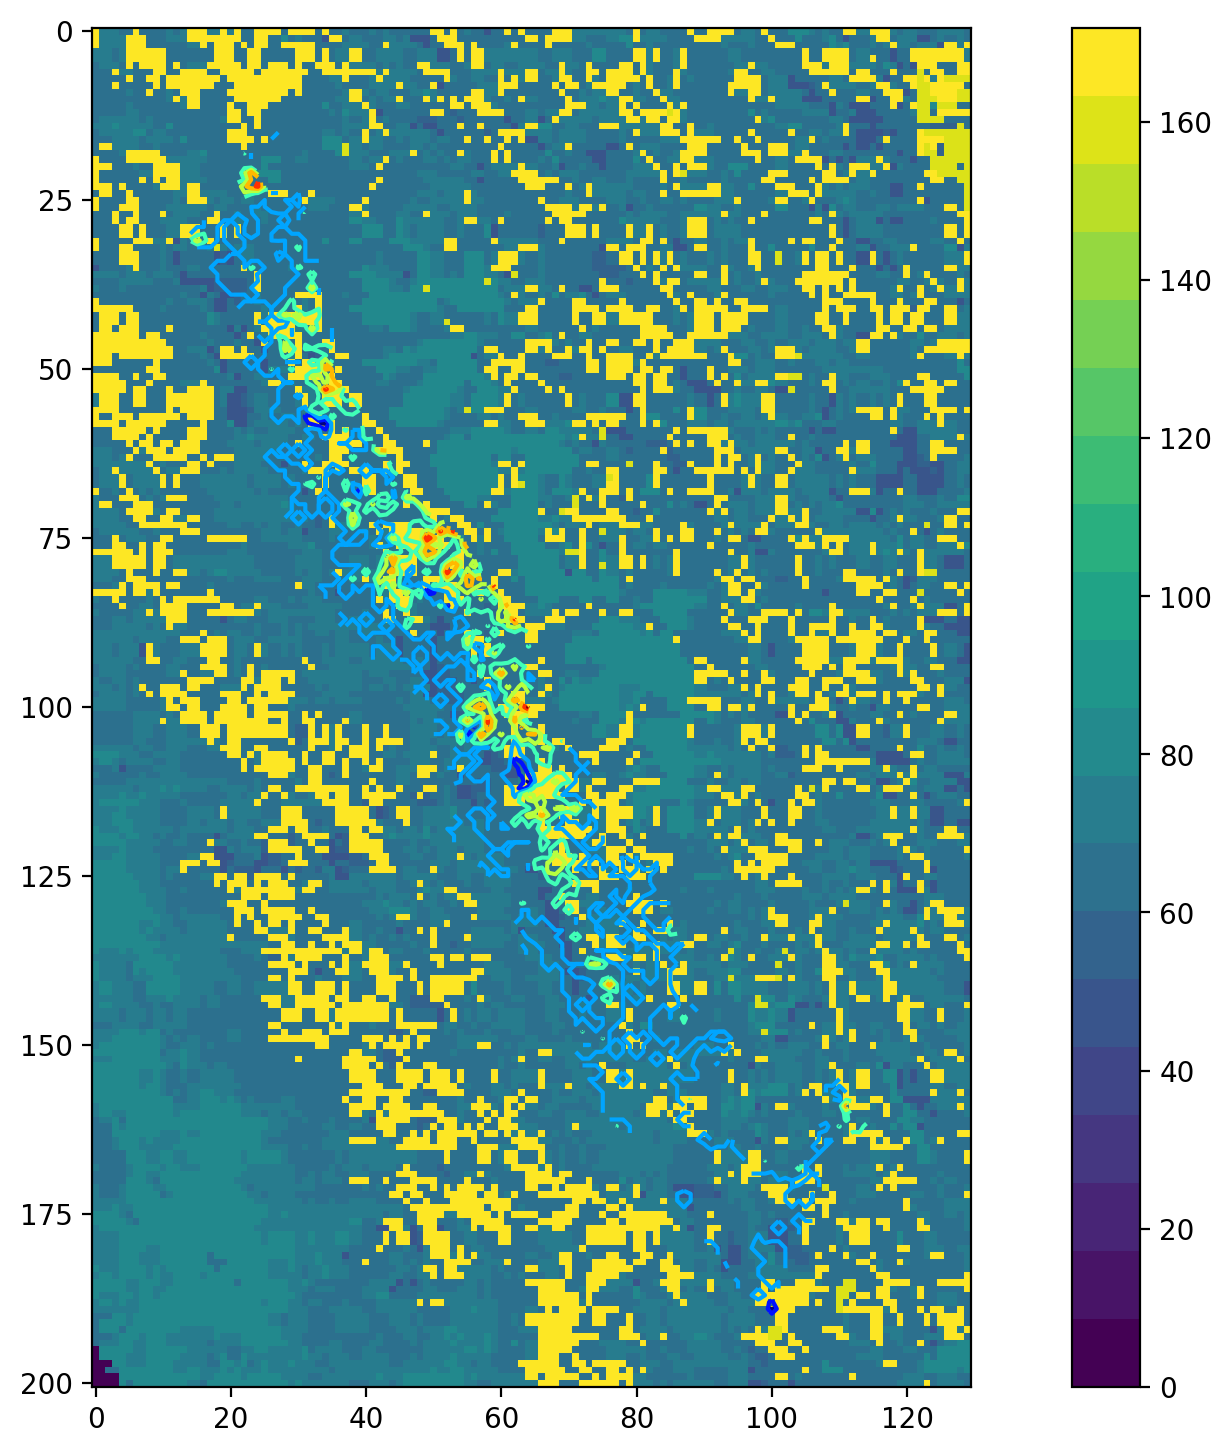

In [128]:
%matplotlib inline
f = plt.figure(figsize=(13,9), dpi=200)
plt.imshow(ls, cmap=dmap)
plt.colorbar()
plt.contour(coarse_sig[0,:,:], cmap='jet')


In [113]:
coarse_sig = g.grid.lookup_transform(sig)

In [114]:
np.unique(ls)

array([  0,  50,  51,  52,  61,  64,  65,  68,  69,  70,  71,  75,  80,
        81,  83,  84, 160, 161, 170, 172], dtype=uint8)

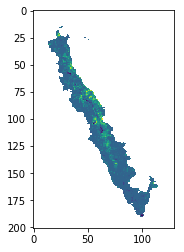

In [115]:
plt.imshow(coarse_sig[0,:,:])

In [116]:
lpoints = ls[coarse_sig[4,:,:]>0.003]

In [117]:
num, cnt = np.unique(lpoints, return_counts=True)

In [118]:
num

array([ 51,  52,  64,  65,  68,  69,  83, 172], dtype=uint8)

In [119]:
cnt

array([  5,  12, 173, 211,  52,  34,   1, 174])

In [120]:
np.unique(ls)

array([  0,  50,  51,  52,  61,  64,  65,  68,  69,  70,  71,  75,  80,
        81,  83,  84, 160, 161, 170, 172], dtype=uint8)